In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sps

In [26]:
import sympy as smp

## Задача 1.  Матричные вычисления, оценка скорости и погрешностей (5 баллов).

1. Напишите функцию, которая вычисляет квадратный корень из матрицы размера $2 \times 2$, используя Жорданову форму матрицы
$$
\text {Пусть } M^{-1} A M=J ; \text {тогда } M J^{\frac{1}{2}} M^{-1} \text { квадратный корень из } A
$$
Элементами матрицы могут быть любые комплексные числа.
Функция должна отдельно обрабатывать случай с кратными собственными числами. Кроме того, она должна определять (делать отдельную проверку), существует ли этот корень вообще. Если для данной матрицы квадратного корня не существует, должен быть соответствующий вывод.

Указание: использовать формулы

$$
\left(\begin{array}{ll}
a & 1 \\
0 & a
\end{array}\right)^{\frac{1}{2}}= \left(\begin{array}{cc}
\sqrt{a} & \frac{1}{2 \sqrt{a}} \\
0 & \sqrt{a}
\end{array}\right) .
$$

$$
\left(\begin{array}{ll}
a & 0 \\
0 & b
\end{array}\right)^{\frac{1}{2}}=\left(\begin{array}{cc}
 \sqrt{a} & 0 \\
0 &  \sqrt{b}
\end{array}\right) .
$$

2. Напишите функцию, которая генерирует большое количество случайных матриц размера $2 \times 2$, состоящих из вещественных чисел из диапазона от 0 до 1 и для каждой вычисляет квадратный корень. Постройте график зависимости времени работы программы в зависимости от количества вычисляемых корней из матриц.

3. Напишите функцию, которая генерирует большое количество (не менее 1000) матриц размера $2 \times 2$, которые являются квадратами случайных матриц, состоящих из натуральных чисел, не превосходящих по модулю 100, причем в каждой строке максимальный элемент стоит на диагонали матрицы. Эти случайные матрицы тоже нужно сохранить. Квадраты матриц нужны для вычисления ошибки написанного вами алгоритма, так как корни из них известны точно. Постройте график относительной ошибки этих вычислений (по спектральной норме) в зависимости от числа обусловленности сгенерированной матрицы.

4. После выполнения пункта 3 выберите какую-то одну матрицу из этого множества с большим числом обусловленности, сгенерируйте 1000 случайных матриц для возмущений, элементы которых вещественные числа, распределенные равномерно в диапазоне от -0.01 до 0.01. Постройте график спектральной нормы разницы точного значения квадратного корня из целочисленной матрицы и вычисляемого квадратного корня из суммы матрицы и её возмущения, в зависимости от нормы возмущения. Затем возьмите матрицу с маленьким числом обусловленности и проделайте то же самое.

5. Напишите функцию, которая для произвольной матрицы размера $2 \times 2$ с комплексными числами количество её квадратных корней, включая комплексные. Приведите пример матрицы для каждого случая. В каком случае их бесконечно много?

## 1

In [92]:
import cmath

In [199]:
def square_root_of_matrix(matrix):
    values = [np.array(smp.Matrix(matrix).jordan_form()[1]).astype(np.float64)[0][0], np.array(smp.Matrix(matrix).jordan_form()[1]).astype(np.float64)[1][1]]
    M = np.array(smp.Matrix(matrix).jordan_form()[0]).astype(np.float64)
    if np.linalg.matrix_rank(M)<2:
        return "there is no square root of such matrix"
    if values[0]==values[1] and values[0]!=0:
        J_square = np.matrix([[np.sqrt(values[0]), 1/(2*cmath.sqrt(values[0]))], [0, cmath.sqrt(values[1])]])
        return M@J_square@np.linalg.inv(M)
    else:
        J_square = np.matrix([[cmath.sqrt(values[0]), 0], [0, cmath.sqrt(values[1])]])
        return M@J_square@np.linalg.inv(M)

In [200]:
A = np.matrix([[0, -1], [1, 2]])
square_root_of_matrix(A)

matrix([[ 0.5+0.j, -0.5+0.j],
        [ 0.5+0.j,  1.5+0.j]])

In [202]:
B = np.matrix([[-1+0j, 0],[0, -4+0j]])
square_root_of_matrix(B)

matrix([[0.+1.j, 0.+0.j],
        [0.+0.j, 0.+2.j]])

## 2

In [71]:
import time

In [203]:
def generator(N):
    amount = np.linspace(0,N,N)
    time_array = []
    start_time = time.time()
    for i in range (0, N):
        matrix = np.random.rand(2, 2)
        square_root = square_root_of_matrix(matrix)
        time_array.append(time.time()-start_time)
    plt.figure(figsize=(10,6))
    plt.xlabel('Количество посчитанных матриц')
    plt.ylabel('Затраченное время, сек')
    plt.title('Время проведения операции')
    plt.grid(True)
    plt.plot(amount, time_array)

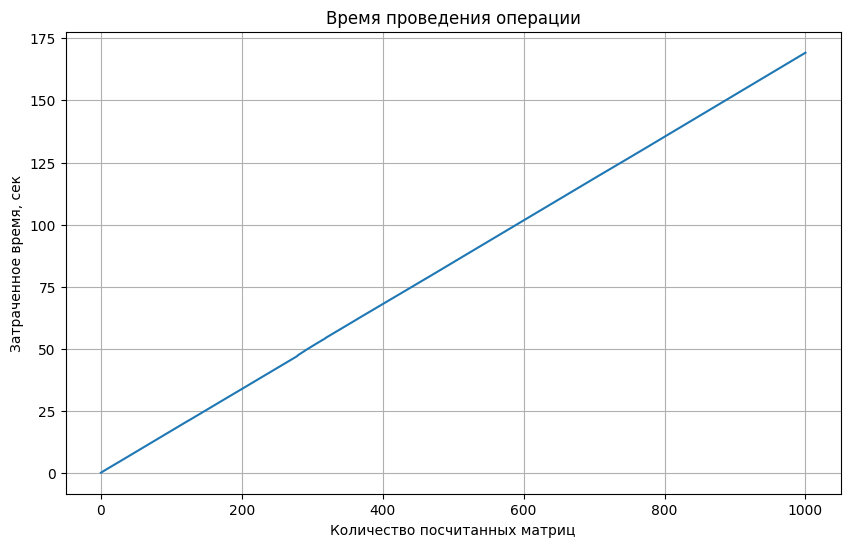

In [204]:
generator(1000)

Видно, что время линейно от количества матриц, то есть вне зависимости от матрицы, вычисление её корня занимает примерно одно и то же время

## 3

In [205]:
matrix_array = []
square_matrix_array = []
def new_generator(N):
    for i in range (0, N):
        D = np.random.randint(0, 100, (2, 2))
        G = np.array([[np.max(D, axis=1)[0], np.min(D, axis=1)[0]],[np.min(D, axis=1)[1], np.max(D, axis=1)[1]]])
        matrix_array.append(G)
        square_matrix_array.append(G@G)
new_generator(1000)    

In [ ]:
conditionality_number = []
calculated = []
relative_error = []

for matrix in square_matrix_array:
    conditionality_number.append(np.linalg.norm(matrix, 2)*np.linalg.norm(np.linalg.inv(matrix), 2))
    calculated.append(square_root_of_matrix(matrix))

for i in range (0, np.shape(square_matrix_array)[0]):
    relative_error.append(np.linalg.norm(calculated[i]-matrix_array[i], 2)/np.linalg.norm(matrix_array[i], 2))

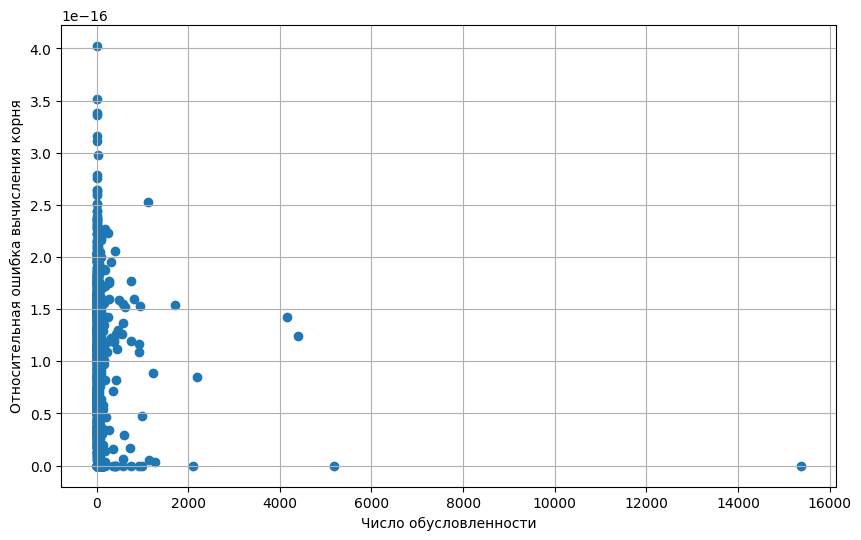

In [234]:
plt.figure(figsize=(10,6))
plt.xlabel('Число обусловленности')
plt.ylabel('Относительная ошибка вычисления корня')
plt.grid(True)
plt.scatter(conditionality_number, relative_error)

Относительная ошибка всех вычисленных корней составляет порядка $10^{-16}$, вне зависимости от числа обусловленности. По полученным данным можно сказать, что нет явной зависимости погрешности вычисления квадратного корня от величины числа обусловленности

## 4

Возьмем матрицу из полученного ранее массива, имеющую число обусловленности в районе 15 тысяч:

In [230]:
for matrix in square_matrix_array:
    if np.linalg.norm(matrix, 2)*np.linalg.norm(np.linalg.inv(matrix), 2)>14000:
        chosen = matrix

chosen

array([[7236, 5220],
       [ 261,  189]])

In [ ]:
fluctuation = []
fluctuation_norm = []
difference = []
for i in range (0, 1000):
    osc = np.random.uniform(-0.01, 0.01, (2, 2))
    fluctuation.append(osc)
    fluctuation_norm.append(np.linalg.norm(osc, 2))

for fluc in fluctuation:
    difference.append(np.linalg.norm(square_root_of_matrix(chosen+fluc) - square_root_of_matrix(chosen), 2))

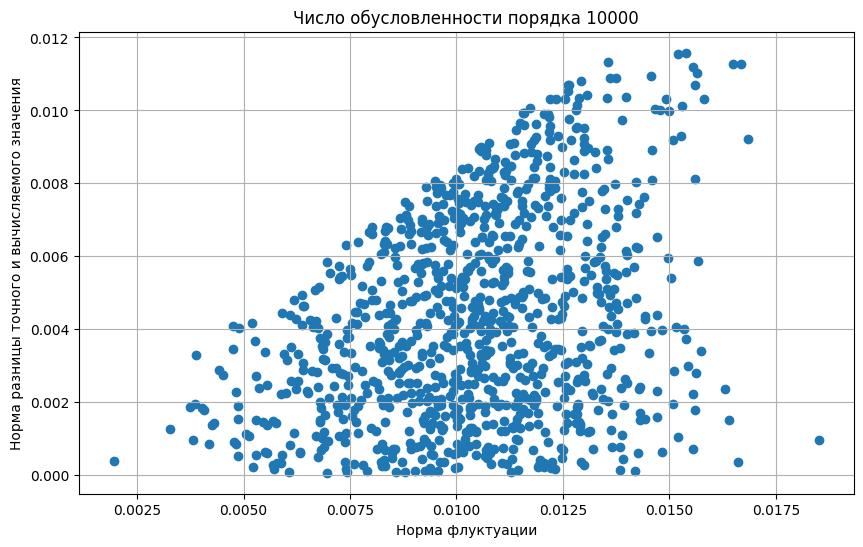

In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel('Норма флуктуации')
plt.ylabel('Норма разницы точного и вычисляемого значения')
plt.title('Число обусловленности порядка 10000')
plt.grid(True)
plt.scatter(fluctuation_norm, difference)

Аналогично для матрицы с числом обусловленности менее десяти:

In [231]:
for matrix in square_matrix_array:
    if np.linalg.norm(matrix, 2)*np.linalg.norm(np.linalg.inv(matrix), 2)<10:
        chosen_new = matrix

chosen_new

array([[1040, 1904],
       [ 119, 7585]])

In [ ]:
new_difference = []

for fluc in fluctuation:
    new_difference.append(np.linalg.norm(square_root_of_matrix(chosen_new+fluc) - square_root_of_matrix(chosen_new), 2))

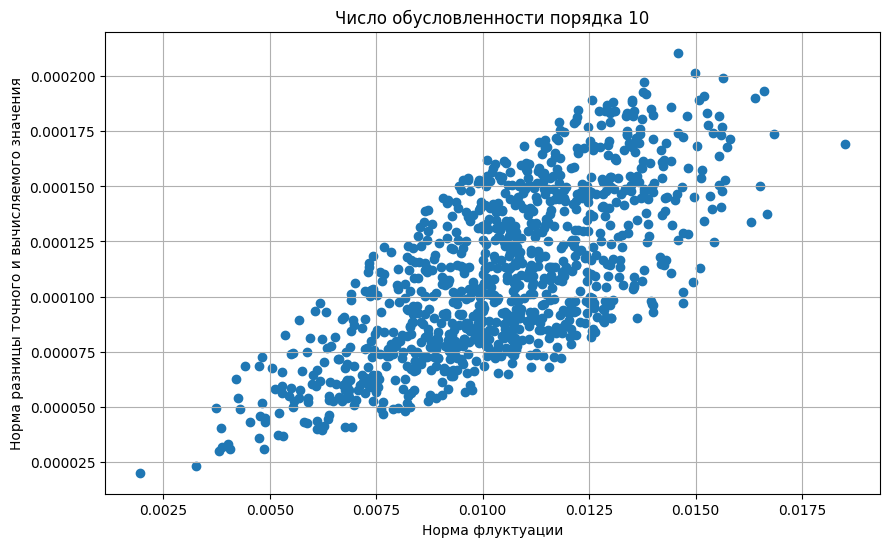

In [239]:
plt.figure(figsize=(10,6))
plt.xlabel('Норма флуктуации')
plt.ylabel('Норма разницы точного и вычисляемого значения')
plt.title('Число обусловленности порядка 10')
plt.grid(True)
plt.scatter(fluctuation_norm, new_difference)

Разница в ошибке для рассмотренных случаев - два порядка, что подтверждает тот факт, что матрицы с бОльшим числом обусловленности сильнее подвержены колебаниям значений входных данных: в рассмотренных выше случаях флуктуации были одинаковыми, однако точность вычисления сильно хуже для матрицы с бОльшим числом обусловленности. 

В целом можно увидеть некоторую закономерность из графиков: есть некоторая огибающая прямая ошибки вычисления корня в зависимости от числа обусловленности, а все полученные данные могут находиться в произвольном месте под этой экстремальной прямой. Как бы то ни было, рассматривая худший случай, коэффициент наклона данной прямой больше примерно в 100 раз для матрицы с числом обусловленности в примерно 1000 раз больше

## Задача 2. Регуляризация и регрессия, метод наименьших квадратов и SVD (4 балла).

В `BinaryLogisticLoss` вам нужно реализовать расчет лосса и его градиента для функции
$$L(w) = \frac{1}{N} \sum_{N} [\log(1 + \exp(-y_i\langle w, x_i\rangle))] + \lambda \lVert w \rVert^2_2, \quad y \in \{-1, 1\}$$

- `func(self, X, y, w)` — вычисление значения функции потерь на матрице признаков X, векторе ответов y с вектором весов w.
- `grad(self, X, y, w)` — вычисление значения градиента функции потерь на матрице признаков X, векторе ответов y с вектором весов w.

У обоих методов одинаковые аргументы:
- X - выборка объектов
- y - вектор ответов
- w - вектор коэффициентов модели

Вектор коэффициентов имеет вид: w = `[bias, weights]`, то есть нулевой элемент w - `bias`, остальное - веса, участвующие в скалярном произведении. **Важно:** `bias` не участвует в расчете слагаемого с $\lambda$.

Обратите внимание, что на матрица X на входе без столбца с 1 в начале. Пример изменения Х внутри кода функций:
```python
X_new =  np.concatenate([X, np.ones(X.shape[0]), axis = 1)
```

Или
```python
X_new =np.hstack((X, ones[:, np.newaxis]))

```

Или
```python
onesX = np.ones((X.shape[0],1))
X_new = np.concatenate((X, onesX), axis=1)
```

In [386]:
import numpy as np
import scipy
from scipy.special import expit
from scipy.special import logsumexp

class BinaryLogisticLoss():
    """
    Loss function for binary logistic regression.
    It should support l2 regularization.
    """

    def __init__(self, l2_coef):
        """
        Parameters
        ----------
        l2_coef - l2 regularization coefficient
        """
        self.l2_coef = l2_coef

    def func(self, X, y, w):
        """
        Get loss function value for data X, target y and coefficient w; w = [bias, weights].

        Parameters
        ----------
        X : numpy.ndarray
        y : 1d numpy.ndarray
        w : 1d numpy.ndarray

        Returns
        -------
        : float
        """
        X_new =  np.hstack([np.ones((X.shape[0], 1)),X])
        sum = 0
        for i in range (0, y.shape[0]):
            if (-y[i]*w@(X_new[i,:].T)) < 709:  # Условие на превышение лимита подсчета экспоненты
                sum+=np.log(1+np.exp((-y[i]*w@(X_new[i,:].T))))
            else:
                sum+=(-y[i]*w@(X_new[i,:].T))
        return 1/y.shape[0]*sum + self.l2_coef*(np.linalg.norm(w[1:], 2))**2

    def grad(self, X, y, w):
        """
        Get loss function gradient for data X, target y and coefficient w; w = [bias, weights].

        Parameters
        ----------
        X : numpy.ndarray
        y : 1d numpy.ndarray
        w : 1d numpy.ndarray

        Returns
        -------
        : 1d numpy.ndarray
        """
        X_new =  np.hstack([np.ones((X.shape[0], 1)),X])
        grad=np.zeros(w.shape[0])
        for j in range (0, w.shape[0]):
            for i in range (0, y.shape[0]):
                grad[j]+=1/y.shape[0]*np.exp(-y[i]*w@(X_new[i,:]).T)*(-y[i]*X_new[i,j])/(1+np.exp(-y[i]*w@(X_new[i,:]).T)) 
        return grad + np.array([0, *w[1:]*2*self.l2_coef])

In [388]:
loss_function = BinaryLogisticLoss(l2_coef=1.0)
X = np.array([
    [1, 2],
    [3, 4],
    [-5, 6]
])
y = np.array([-1, 1, 1])
w = np.array([1, 2, 3])
assert np.isclose(loss_function.func(X, y, w), 16.00008, atol=1e-5)

loss_function = BinaryLogisticLoss(l2_coef=0.0)
X = np.array([
    [10 ** 5],
    [-10 ** 5],
    [10 ** 5]
])
y = np.array([1, -1, 1])
w = np.array([1, 100])
assert np.isclose(loss_function.func(X, y, w), 0, atol=1e-5)

loss_function = BinaryLogisticLoss(l2_coef=0.0)
X = np.array([
    [10 ** 2],
    [-10 ** 2],
    [10 ** 2]
])
y = np.array([-1, 1, -1])
w = np.array([1, 100])
assert np.isclose(loss_function.func(X, y, w), 10000.333334, atol=1e-5)

loss_function = BinaryLogisticLoss(l2_coef=1.0)
X = np.array([
    [1, 2],
    [3, 4],
    [-5, 6]
])
y = np.array([-1, 1, 1])
w = np.array([1, 2, 3])
right_gradient = np.array([0.33325, 4.3335 , 6.66634])
assert np.isclose(loss_function.grad(X, y, w), right_gradient, atol=1e-5).all()

## Задача 3. Решение нелинейных уравнений и поиск минимума функций. (3 балла).

Рассмотрим матричное уравнение для матриц размера $2 \times 2$:

$$
X = A^{0.5}
$$

1. Решите его, используя метод Ньютона:

$$
\  X_0=I_n;\  X_{n+1}=\frac{1}{2}\left(X_n+A X_n^{-1}\right) .
$$

2. Сгенерируйте большое количество матриц размера $2 \times 2$ с положительными собственными числами, и разными значениями числа обусловленности, которые являются квадратами случайных матриц с целыми числами (что позволяет точно контролировать погрешность). Постройте график количества итераций, необходимого для получения ответа с относительной погрешностью не больше $10^{-6}$ по спектральной норме, в зависимости от числа обусловленности.

3. После выполнения пункта 2 выберите какую-то одну матрицу из этого множества с большим числом обусловленности, сгенерируйте 1000 случайных матриц для возмущений, элементы которых вещественные числа, распределенные равномерно в диапазоне от -0.01 до 0.01. Постройте график спектральной нормы разницы точного значения квадратного корня из целочисленной матрицы и вычисляемого квадратного корня из суммы матрицы и её возмущения, в зависимости от нормы возмущения. Затем возьмите матрицу с маленьким числом обусловленности и проделайте то же самое.

